# Data Collection

In [ ]:
import glob
import psycopg2
import time


conn = psycopg2.connect(
    host="localhost",
    database="citibike_db",
    user="postgres",
    password="postgres"
)
cur = conn.cursor()

csv_files = glob.glob('../data/2024*.csv')
print(f"Number of files: {len(csv_files)}")

count = 0
for file in csv_files:
    start = time.time()
    print(f"Work on {file}")
    with open(file, 'r') as f:
        next(f)  # jump header

        cur.copy_expert("COPY citibike_trips_2024 FROM STDIN WITH (FORMAT CSV)", f)
        conn.commit()
    count += 1
    print(f"{count}/{len(csv_files)} Done. It took {time.time()-start}")

conn.close()

Number of files: 50
Work on data/202405-citibike-tripdata_3.csv
1/50 Done. It took 1.9857008457183838
Work on data/202405-citibike-tripdata_2.csv
2/50 Done. It took 1.9618749618530273
Work on data/202405-citibike-tripdata_1.csv
3/50 Done. It took 1.9396607875823975
Work on data/202405-citibike-tripdata_5.csv
4/50 Done. It took 0.2509498596191406
Work on data/202401-citibike-tripdata_2.csv
5/50 Done. It took 1.748887062072754
Work on data/202412-citibike-tripdata_1.csv
6/50 Done. It took 2.0352110862731934
Work on data/202405-citibike-tripdata_4.csv
7/50 Done. It took 2.0029349327087402
Work on data/202412-citibike-tripdata_3.csv
8/50 Done. It took 0.6308376789093018
Work on data/202401-citibike-tripdata_1.csv
9/50 Done. It took 1.9922542572021484
Work on data/202412-citibike-tripdata_2.csv
10/50 Done. It took 2.3372859954833984
Work on data/202402-citibike-tripdata_1.csv
11/50 Done. It took 2.0544698238372803
Work on data/202411-citibike-tripdata_3.csv
12/50 Done. It took 2.04186511039

In [127]:
import glob
import psycopg2
import time


conn = psycopg2.connect(
    host="localhost",
    database="citibike_db",
    user="postgres",
    password="postgres"
)
cur = conn.cursor()

csv_files = glob.glob('../data/2025*.csv')
print(f"Number of files: {len(csv_files)}")

count = 0
for file in csv_files:
    start = time.time()
    print(f"Work on {file}")
    with open(file, 'r') as f:
        next(f)  # jump header

        cur.copy_expert("COPY citibike_trips_2025 FROM STDIN WITH (FORMAT CSV)", f)
        conn.commit()
    count += 1
    print(f"{count}/{len(csv_files)} Done. It took {time.time()-start}")

conn.close()

Number of files: 50
Work on ../data/202510-citibike-tripdata_3.csv
1/50 Done. It took 2.712682008743286
Work on ../data/202503-citibike-tripdata_1.csv
2/50 Done. It took 2.1903679370880127
Work on ../data/202508-citibike-tripdata_6.csv
3/50 Done. It took 0.3439810276031494
Work on ../data/202510-citibike-tripdata_2.csv
4/50 Done. It took 2.0754640102386475
Work on ../data/202503-citibike-tripdata_2.csv
5/50 Done. It took 2.1859562397003174
Work on ../data/202507-citibike-tripdata_5.csv
6/50 Done. It took 2.104322910308838
Work on ../data/202508-citibike-tripdata_4.csv
7/50 Done. It took 2.010369062423706
Work on ../data/202508-citibike-tripdata_5.csv
8/50 Done. It took 2.035248041152954
Work on ../data/202507-citibike-tripdata_4.csv
9/50 Done. It took 2.0710580348968506
Work on ../data/202503-citibike-tripdata_3.csv
10/50 Done. It took 2.0194690227508545
Work on ../data/202510-citibike-tripdata_1.csv
11/50 Done. It took 2.0085208415985107
Work on ../data/202510-citibike-tripdata_5.csv


# Data Preprocessing

In [ ]:
import pandas as pd


df = pd.read_csv("../data/2024_top3.csv")

/var/folders/p8/xm1_mmt52534xk0_68g3qwrw0000gn/T/ipykernel_50687/2253967772.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/2024_top3.csv")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881843 entries, 0 to 881842
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             881843 non-null  object 
 1   rideable_type       881843 non-null  object 
 2   started_at          881843 non-null  object 
 3   ended_at            881843 non-null  object 
 4   start_station_name  881696 non-null  object 
 5   start_station_id    881696 non-null  object 
 6   end_station_name    881188 non-null  object 
 7   end_station_id      881090 non-null  object 
 8   start_lat           881696 non-null  float64
 9   start_lng           881696 non-null  float64
 10  end_lat             881093 non-null  float64
 11  end_lng             881093 non-null  float64
 12  member_casual       881843 non-null  object 
dtypes: float64(4), object(9)
memory usage: 87.5+ MB


In [10]:
# Check mixed data-type columns
for column in df.columns:
    print(f"{column} dtypes: {df[column].apply(type).unique()}")

ride_id dtypes: [<class 'str'>]
rideable_type dtypes: [<class 'str'>]
started_at dtypes: [<class 'str'>]
ended_at dtypes: [<class 'str'>]
start_station_name dtypes: [<class 'str'> <class 'float'>]
start_station_id dtypes: [<class 'str'> <class 'float'>]
end_station_name dtypes: [<class 'str'> <class 'float'>]
end_station_id dtypes: [<class 'str'> <class 'float'>]
start_lat dtypes: [<class 'float'>]
start_lng dtypes: [<class 'float'>]
end_lat dtypes: [<class 'float'>]
end_lng dtypes: [<class 'float'>]
member_casual dtypes: [<class 'str'>]


In [11]:
for column in ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']:
    print(f"{column}: {df[df[column].apply(lambda x: isinstance(x, float))].shape}")

start_station_name: (147, 13)
start_station_id: (488683, 13)
end_station_name: (655, 13)
end_station_id: (227059, 13)


In [20]:
df[df['start_station_name'].apply(lambda x: isinstance(x, float))]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2207,B585E940ADC0E92E,electric_bike,2024-03-10 13:12:05.895,2024-03-10 13:18:20.949,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
2460,0C85A69BB26955D3,electric_bike,2024-03-09 11:59:10.926,2024-03-09 12:06:14.038,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
4267,C3206594386248F5,electric_bike,2024-03-11 18:09:31.262,2024-03-11 18:12:50.064,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
5356,4A557C098F12A9A6,electric_bike,2024-03-07 18:09:32.787,2024-03-07 18:17:16.453,NaN,NaN,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,member
9989,B607B2A8E3D72082,electric_bike,2024-05-22 18:52:36.338,2024-05-22 19:31:31.928,NaN,NaN,8 Ave & W 31 St,NaN,NaN,NaN,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842323,3EAB2129FE2EBA47,electric_bike,2024-10-12 15:20:18.127,2024-10-12 15:30:57.251,NaN,NaN,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,member
862282,E2D3992AB6B4C6D6,electric_bike,2024-10-22 15:39:52.424,2024-10-22 15:41:37.255,NaN,NaN,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,member
872009,9107DC38A2128488,electric_bike,2024-03-04 08:55:27.899,2024-03-04 09:03:02.663,NaN,NaN,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,member
874674,85F5A2652AAFB728,electric_bike,2024-03-14 08:03:59.656,2024-03-14 08:08:50.984,NaN,NaN,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,member


In [ ]:
# Drop NaN
df = df.dropna(subset=['start_station_name'])

In [22]:
for column in ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']:
    print(f"{column}: {df[df[column].apply(lambda x: isinstance(x, float))].shape}")

start_station_name: (0, 13)
start_station_id: (488536, 13)
end_station_name: (655, 13)
end_station_id: (227019, 13)


In [23]:
df[df['end_station_name'].apply(lambda x: isinstance(x, float))]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
27649,D42297B17275F5FE,electric_bike,2024-05-21 22:31:48.425,2024-05-22 00:21:46.409,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,NaN,NaN,member
27655,B25DB0A085B004CE,electric_bike,2024-05-25 14:32:18.68,2024-05-25 18:27:42.475,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,NaN,NaN,casual
27679,A577BABFBCBA3268,classic_bike,2024-05-18 16:13:19.377,2024-05-19 17:13:16.389,8 Ave & W 31 St,6450.05,NaN,NaN,40.750585,-73.994685,NaN,NaN,casual
27682,3C21BF048495C387,electric_bike,2024-05-20 21:28:37.376,2024-05-20 22:52:29.686,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,NaN,NaN,member
27690,249A263929ADFB89,electric_bike,2024-05-21 07:38:23.374,2024-05-21 08:50:56.788,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874280,9EFBB57BFFBCDA05,electric_bike,2024-03-09 13:35:58.113,2024-03-09 14:42:13.708,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,NaN,NaN,casual
874289,B99414E8B5DA01A3,electric_bike,2024-03-04 17:32:27.765,2024-03-04 18:43:06.213,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,NaN,NaN,member
874292,C99CBD7ED13DD682,classic_bike,2024-03-11 12:50:56.798,2024-03-12 13:50:51.474,W 21 St & 6 Ave,6140.05,NaN,NaN,40.741740,-73.994156,NaN,NaN,member
874294,448E4DF60286926F,electric_bike,2024-03-04 15:22:00.708,2024-03-04 23:21:44.349,University Pl & E 14 St,5905.14,NaN,NaN,40.734814,-73.992085,NaN,NaN,member


In [24]:
# Drop NAN
df = df.dropna(subset=['end_station_name'])

In [25]:
df[df.isnull().any(axis=1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
8192,928E742845EB00AF,electric_bike,2024-05-25 00:01:32.784,2024-05-25 00:46:51.498,8 Ave & W 31 St,6450.05,E 31 St & 3 Ave,NaN,40.750585,-73.994685,NaN,NaN,member
8323,417B2EA4DBBA7ACC,electric_bike,2024-05-20 16:10:46.222,2024-05-20 16:22:28.322,University Pl & E 14 St,5905.14,Allen St & Hester St,NaN,40.734814,-73.992085,NaN,NaN,member
8434,36B3412324198E4F,electric_bike,2024-05-19 17:34:24.52,2024-05-19 18:22:45.941,University Pl & E 14 St,5905.14,Allen St & Hester St,NaN,40.734814,-73.992085,NaN,NaN,member
10067,093AC434B0047753,electric_bike,2024-05-22 16:32:05.856,2024-05-22 18:39:21.909,Lispenard St & Broadway,5391.06,8 Ave & W 31 St,NaN,40.719392,-74.002472,NaN,NaN,member
10096,1111CDB9A61A21E5,electric_bike,2024-05-31 09:08:12.326,2024-05-31 09:16:03.837,E 41 St & Madison Ave (SE corner),6432.10,8 Ave & W 31 St,NaN,40.752049,-73.979635,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770077,1D764DF1BBC5553A,electric_bike,2024-03-11 20:40:26.526,2024-03-11 20:49:24.337,University Pl & E 14 St,5905.14,Ave D & E 8 St,NaN,40.734814,-73.992085,NaN,NaN,member
840402,2C1EF9A02CD1547B,electric_bike,2024-10-03 07:44:24.665,2024-10-03 08:08:27.85,University Pl & E 14 St,5905.14,E 102 St & Park Ave,NaN,40.734814,-73.992085,NaN,NaN,member
852336,77D4B9B803C893F5,electric_bike,2024-10-14 11:05:32.567,2024-10-14 11:10:58.14,University Pl & E 14 St,5905.14,E 14 St & Ave B,NaN,40.734814,-73.992085,NaN,NaN,member
876637,3946EA2DBA734197,electric_bike,2024-03-14 15:29:04.522,2024-03-14 15:39:16.865,N Moore St & Hudson St,5470.02,University Pl & E 14 St,NaN,40.719961,-74.008443,NaN,NaN,member


In [26]:
# Drop all NaN
df = df.dropna()

df[df.isnull().any(axis=1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             880946 non-null  object 
 1   rideable_type       880946 non-null  object 
 2   started_at          880946 non-null  object 
 3   ended_at            880946 non-null  object 
 4   start_station_name  880946 non-null  object 
 5   start_station_id    880946 non-null  object 
 6   end_station_name    880946 non-null  object 
 7   end_station_id      880946 non-null  object 
 8   start_lat           880946 non-null  float64
 9   start_lng           880946 non-null  float64
 10  end_lat             880946 non-null  float64
 11  end_lng             880946 non-null  float64
 12  member_casual       880946 non-null  object 
dtypes: float64(4), object(9)
memory usage: 94.1+ MB


In [29]:
df.shape

(880946, 13)

In [37]:
# change to datetime datatype
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             880946 non-null  object        
 1   rideable_type       880946 non-null  object        
 2   started_at          880946 non-null  datetime64[ns]
 3   ended_at            880946 non-null  datetime64[ns]
 4   start_station_name  880946 non-null  object        
 5   start_station_id    880946 non-null  object        
 6   end_station_name    880946 non-null  object        
 7   end_station_id      880946 non-null  object        
 8   start_lat           880946 non-null  float64       
 9   start_lng           880946 non-null  float64       
 10  end_lat             880946 non-null  float64       
 11  end_lng             880946 non-null  float64       
 12  member_casual       880946 non-null  object        
dtypes: datetime64[ns](2), float64(4), 

We can remove `start_station_id`, `end_station_id`, `start_lat`, `start_lng`, `end_lat`, `endlng` because such information is recorded in latitude and longitude.

In [46]:
df = df.drop(columns=['start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             880946 non-null  object        
 1   rideable_type       880946 non-null  object        
 2   started_at          880946 non-null  datetime64[ns]
 3   ended_at            880946 non-null  datetime64[ns]
 4   start_station_name  880946 non-null  object        
 5   end_station_name    880946 non-null  object        
 6   member_casual       880946 non-null  object        
dtypes: datetime64[ns](2), object(5)
memory usage: 86.0+ MB


In [49]:
df['ride_id'].nunique() == len(df)

True

Since `ride_id` is unique, we can remove it. Additionally, `member_casual` is not important for our analysis, we will drop.

In [51]:
df = df.drop(columns=['ride_id', 'member_casual'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880946 entries, 0 to 881842
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       880946 non-null  object        
 1   started_at          880946 non-null  datetime64[ns]
 2   ended_at            880946 non-null  datetime64[ns]
 3   start_station_name  880946 non-null  object        
 4   end_station_name    880946 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 72.6+ MB


In [ ]:
df.to_csv("../data/2024_top3_cleaned.csv", index=False)

# Exploratory Data Analysis

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df= pd.read_csv("data/2024_top3_cleaned.csv")

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880946 entries, 0 to 880945
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       880946 non-null  object        
 1   started_at          880946 non-null  datetime64[ns]
 2   ended_at            880946 non-null  datetime64[ns]
 3   start_station_name  880946 non-null  object        
 4   end_station_name    880946 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 33.6+ MB


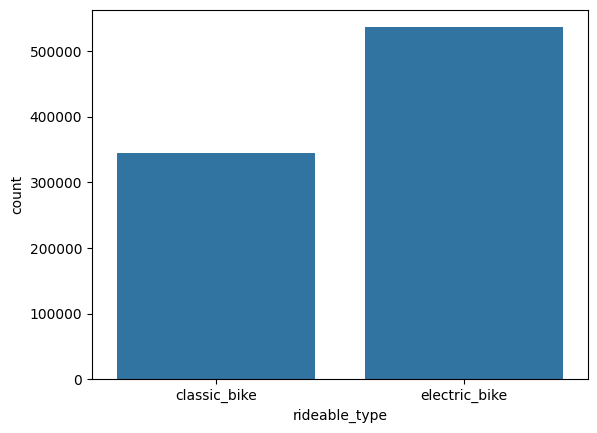

In [74]:
sns.countplot(data=df, x='rideable_type')
plt.show()

In [ ]:
# Calculates the total number of trips starting from each station and sorts them in descending order of trip count
df.groupby('start_station_name').size().reset_index(name='count').sort_values(by='count', ascending=False)

,start_station_name,count
1473,W 21 St & 6 Ave,163308
298,8 Ave & W 31 St,140422
1404,University Pl & E 14 St,139774
1475,W 22 St & 10 Ave,5926
295,8 Ave & W 16 St,5846
...,...,...
1338,St Marks Ave & Rochester Ave,1
454,Bronx Shore Comfort Station,1
190,46 St & 6 Ave,1
458,Brooklyn Ave & Lefferts Ave,1


In [ ]:
# Calculates the total number of trips ending at each station and sorts them in descending order of trip count
df.groupby('end_station_name').size().reset_index(name='count').sort_values(by='count', ascending=False)

,end_station_name,count
1591,W 21 St & 6 Ave,163849
1517,University Pl & E 14 St,142314
319,8 Ave & W 31 St,141704
335,9 Ave & W 22 St,8272
1593,W 22 St & 10 Ave,6599
...,...,...
437,Beverley Rd & E 49 St,1
197,45 Rd & 11 St,1
196,45 Ave & 21 St,1
1201,Midwood St & Utica Ave,1


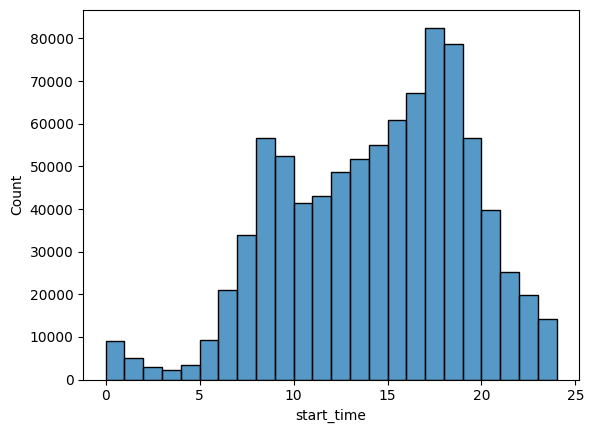

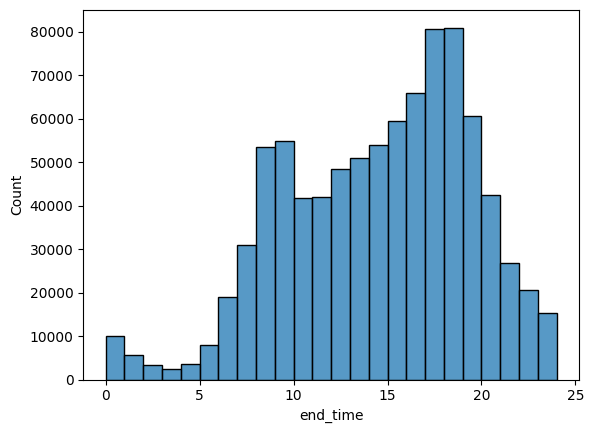

In [77]:
df['start_time'] = df['started_at'].dt.hour + df['started_at'].dt.minute/60 + df['started_at'].dt.second / 3600
df['end_time'] = df['ended_at'].dt.hour + df['ended_at'].dt.minute/60 + df['ended_at'].dt.second / 3600

sns.histplot(x='start_time', data=df, bins=24)
plt.show()

sns.histplot(x='end_time', data=df, bins=24)
plt.show()

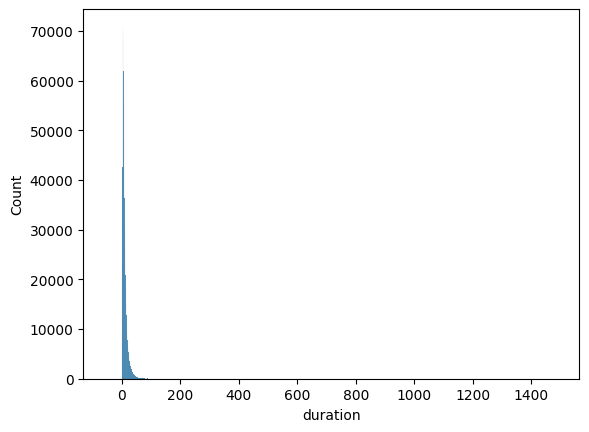

In [78]:
df['duration'] = df['ended_at'] - df['started_at']

df['duration'] = df['duration'].dt.total_seconds() / 60

sns.histplot(x='duration', data=df)
plt.show()


In [79]:
df[np.abs((df['duration']-df['duration'].mean())/df['duration'].std())>2]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_time,end_time,duration
169,classic_bike,2024-03-03 12:11:21.757,2024-03-03 13:44:08.077,8 Ave & W 31 St,Old Slip & South St,12.189167,13.735556,92.772000
185,classic_bike,2024-03-03 12:02:18.614,2024-03-03 13:33:46.109,8 Ave & W 31 St,Old Slip & South St,12.038333,13.562778,91.458250
431,electric_bike,2024-03-03 11:26:48.289,2024-03-03 12:41:26.341,8 Ave & W 31 St,Great Jones St,11.446667,12.690556,74.634200
551,electric_bike,2024-03-03 11:29:26.444,2024-03-03 12:41:30.499,8 Ave & W 31 St,Great Jones St,11.490556,12.691667,72.067583
825,electric_bike,2024-03-11 15:33:58.745,2024-03-11 16:55:49.455,University Pl & E 14 St,E 10 St & Ave A,15.566111,16.930278,81.845167
...,...,...,...,...,...,...,...,...
880303,electric_bike,2024-03-14 12:27:17.237,2024-03-14 13:19:07.635,W 21 St & 6 Ave,46 St & 28 Ave,12.454722,13.318611,51.839967
880318,electric_bike,2024-03-04 14:22:14.761,2024-03-04 15:17:58.488,University Pl & E 14 St,Grove St & Fresh Pond Rd,14.370556,15.299444,55.728783
880490,classic_bike,2024-03-04 17:36:23.642,2024-03-04 18:56:41.381,8 Ave & W 31 St,8 Ave & W 38 St,17.606389,18.944722,80.295650
880747,electric_bike,2024-03-14 18:10:20.171,2024-03-14 19:04:08.398,8 Ave & W 31 St,Motorgate,18.172222,19.068889,53.803783


In [ ]:
# Drop outliers based on duration

df = df[np.abs((df['duration']-df['duration'].mean())/df['duration'].std())<=2]

In [81]:
df.shape

(871384, 8)

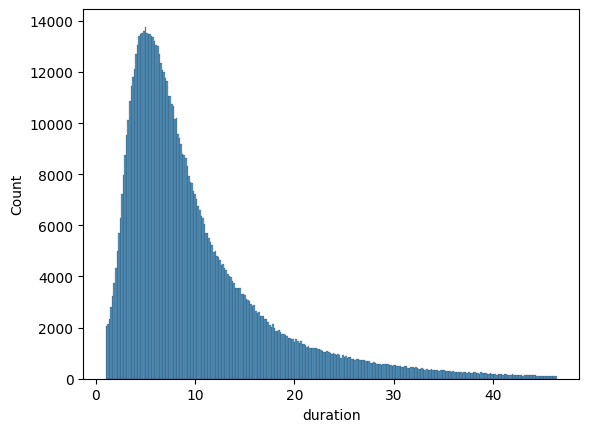

In [82]:
sns.histplot(x='duration', data=df)
plt.show()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871384 entries, 0 to 880945
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       871384 non-null  object        
 1   started_at          871384 non-null  datetime64[ns]
 2   ended_at            871384 non-null  datetime64[ns]
 3   start_station_name  871384 non-null  object        
 4   end_station_name    871384 non-null  object        
 5   start_time          871384 non-null  float64       
 6   end_time            871384 non-null  float64       
 7   duration            871384 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 59.8+ MB


In [ ]:
df.to_csv("../data/2024_top3_eda.csv", index=False)